In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
drug=pd.read_csv("drug200.csv")

In [3]:
drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


<Axes: xlabel='Age', ylabel='Density'>

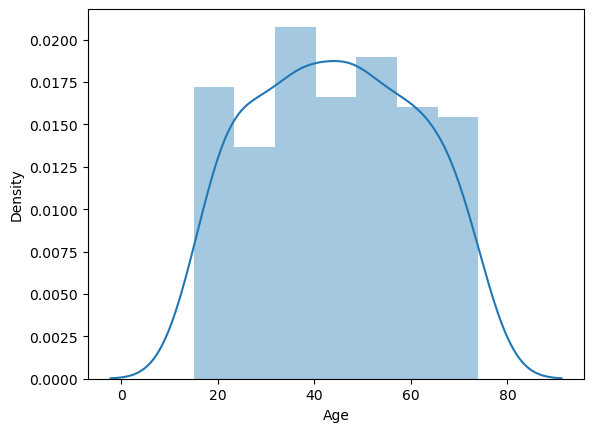

In [4]:
sns.distplot(drug.Age)

<Axes: xlabel='Na_to_K', ylabel='Density'>

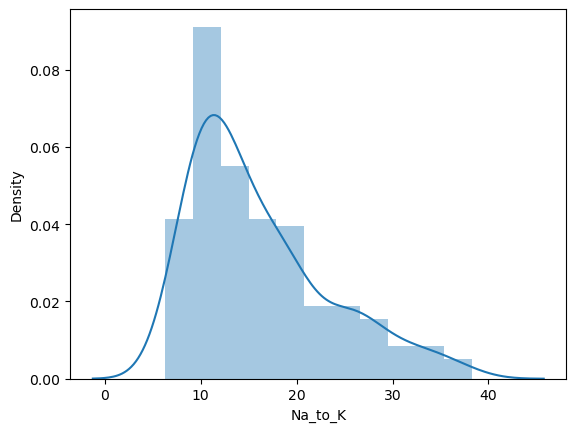

In [5]:
sns.distplot(drug.Na_to_K)

<Axes: xlabel='Sex', ylabel='count'>

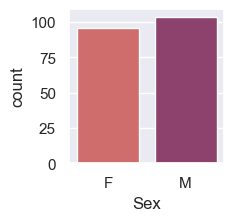

In [6]:
plt.figure(figsize=(2,2))
sns.set_theme(style="darkgrid")
sns.countplot(x=drug.Sex,palette="flare")

<Axes: xlabel='count', ylabel='Drug'>

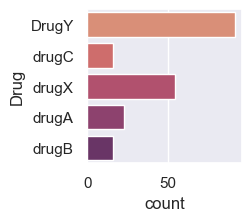

In [7]:
plt.figure(figsize=(2,2))
sns.set_theme(style="darkgrid")
sns.countplot(y=drug.Drug,palette="flare")

<Axes: xlabel='Cholesterol', ylabel='count'>

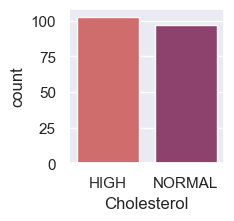

In [8]:
plt.figure(figsize=(2,2))
sns.set_theme(style="darkgrid")
sns.countplot(x=drug.Cholesterol,palette="flare")

<Axes: xlabel='BP', ylabel='count'>

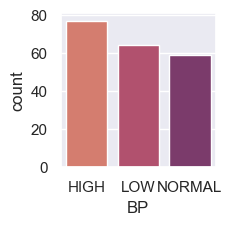

In [9]:
plt.figure(figsize=(2,2))
sns.set_theme(style="darkgrid")
sns.countplot(x=drug.BP,palette="flare")

<BarContainer object of 200 artists>

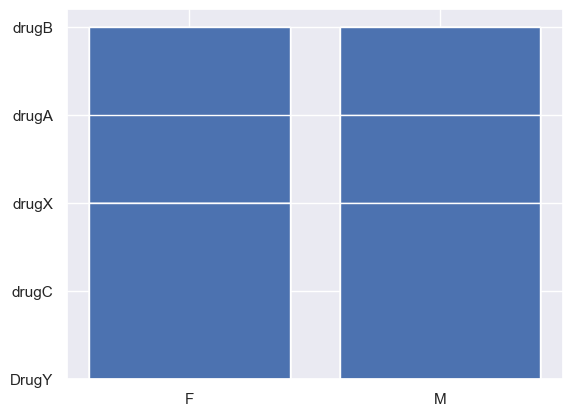

In [10]:
plt.bar(drug.Sex,drug.Drug)

<Axes: xlabel='Sex', ylabel='count'>

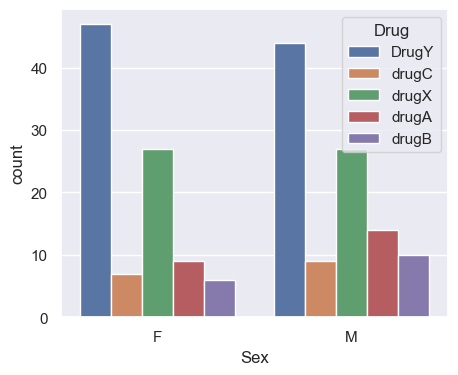

In [11]:
plt.figure(figsize=(5,4))
sns.countplot(x=drug.Sex,hue=drug.Drug)

<Axes: xlabel='Cholesterol', ylabel='count'>

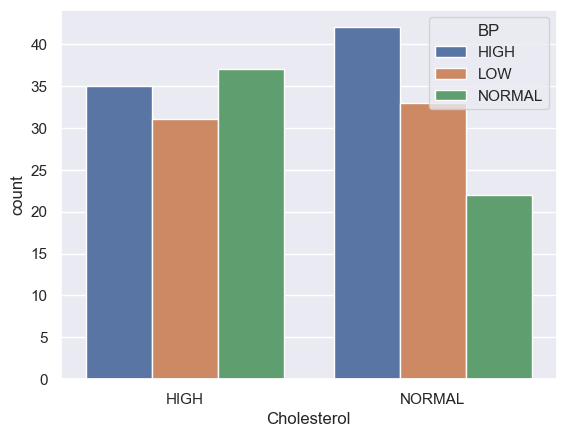

In [12]:
sns.countplot(x=drug.Cholesterol,hue=drug.BP)

# Binning

## Age

In [13]:
drug.Age.unique().max()

74

In [14]:
bins=[0,19,29,39,49,59,69,80]
labels=['<20s','20s','30s','40s','50s','60s','>60s']
drug["Age_binned"]=pd.cut(drug.Age,bins=bins,labels=labels)
drug.drop("Age",axis=1,inplace=True)

In [15]:
drug.Na_to_K.unique().max()

38.247

In [16]:
bins=[0,9,19,29,50]
labels=['<10','10-20','20-30','>30']
drug["Na_to_K_Binned"]=pd.cut(drug.Na_to_K,bins,labels)
drug.drop("Na_to_K",axis=1,inplace=True)


In [17]:
x=drug.drop("Drug",axis=1)
y=drug.Drug

In [18]:
x.head()

,Sex,BP,Cholesterol,Age_binned,Na_to_K_Binned
0,F,HIGH,HIGH,20s,"(19, 29]"
1,M,LOW,HIGH,40s,"(9, 19]"
2,M,LOW,HIGH,40s,"(9, 19]"
3,F,NORMAL,HIGH,20s,"(0, 9]"
4,F,LOW,HIGH,60s,"(9, 19]"


In [20]:
x.Age_binned.unique()

['20s', '40s', '60s', '30s', '>60s', '50s', '<20s']
Categories (7, object): ['<20s' < '20s' < '30s' < '40s' < '50s' < '60s' < '>60s']

In [21]:
x.Sex.unique()

array(['F', 'M'], dtype=object)

In [22]:
x.Cholesterol.unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [23]:
x.Na_to_K_Binned.unique()

[(19, 29], (9, 19], (0, 9], (29, 50]]
Categories (4, interval[int64, right]): [(0, 9] < (9, 19] < (19, 29] < (29, 50]]

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=42)

In [26]:
from sklearn.preprocessing import OneHotEncoder

In [27]:
encoder=OneHotEncoder()

In [28]:
x_train=pd.DataFrame(encoder.fit_transform(x_train).toarray())
x_test=pd.DataFrame(encoder.fit_transform(x_test).toarray())

In [29]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [30]:
from imblearn.over_sampling import SMOTE

In [32]:
x_train,y_train=SMOTE().fit_resample(x_train,y_train)

<Axes: xlabel='count', ylabel='Drug'>

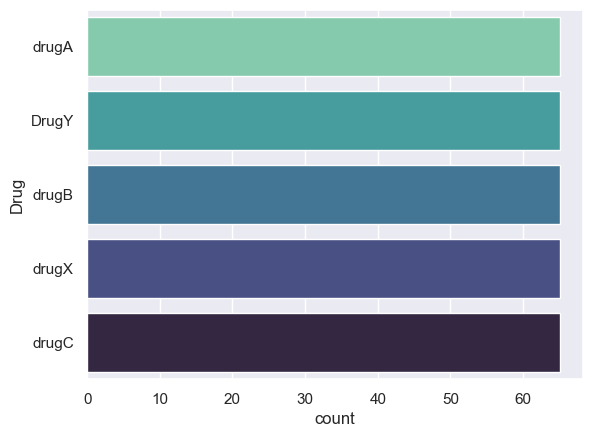

In [35]:
sns.countplot(y=y_train,data=drug,palette='mako_r')

In [36]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [38]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)
log_pred=log_reg.predict(x_test)
print(confusion_matrix(y_test,log_pred))
log_accuracy=accuracy_score(y_test,log_pred)
print(log_accuracy*100)

[[19  0  3  2  2]
 [ 1  6  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  6  0]
 [ 0  0  0  0 18]]
86.66666666666667


In [59]:
from sklearn.neighbors import KNeighborsClassifier
kNN_cls=KNeighborsClassifier(n_neighbors=20,metric="manhattan")
kNN_cls.fit(x_train,y_train)
kNN_pred=kNN_cls.predict(x_test)
print(confusion_matrix(y_test,kNN_pred))
kNN_accuracy=accuracy_score(y_test,kNN_pred)
print(kNN_accuracy*100)

[[12  5  3  2  4]
 [ 0  7  0  0  0]
 [ 0  1  2  0  0]
 [ 0  0  0  6  0]
 [ 1  1  0  0 16]]
71.66666666666667


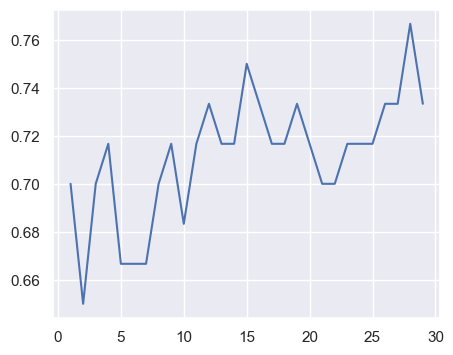

0.7666666666666667


In [79]:
KNNScore=[]
for i in range(1,30):
    KNN_cls=KNeighborsClassifier(n_neighbors=i,metric="manhattan")
    KNN_cls.fit(x_train,y_train)
    KNN_pred=KNN_cls.predict(x_test)
    KNN_accuracy_max=accuracy_score(y_test,KNN_pred)
    KNNScore.append(KNN_accuracy_max)
plt.figure(figsize=(5,4))
plt.plot(range(1,30),KNNScore)
plt.show()
print(max(KNNScore))
KNN_max=max(KNNScore)

In [47]:
from sklearn.naive_bayes import CategoricalNB
CNB_cls=CategoricalNB()
CNB_cls.fit(x_train,y_train)
CNB_pred=CNB_cls.predict(x_test)
CNB_accuracy=accuracy_score(y_test,CNB_pred)
CNB_accuracy

0.8

In [56]:
from sklearn.naive_bayes import GaussianNB
GNB_cls=GaussianNB()
GNB_cls.fit(x_train,y_train)
GNB_pred=CNB_cls.predict(x_test)
GNB_accuracy=accuracy_score(y_test,CNB_pred)
GNB_accuracy

0.8

In [57]:
from sklearn.svm import SVC
svm_cls=SVC(kernel='linear',max_iter=250)
svm_cls.fit(x_train,y_train)
svm_predict=svm_cls.predict(x_test)
svm_accuracy=accuracy_score(y_test,svm_predict)
svm_accuracy

0.8

In [81]:
accuracy=pd.DataFrame({"Model":["Logistic Regression","CategoricalNB","GuassianNB","SVC","KNeighbors"],"Accuracy":[log_accuracy*100,CNB_accuracy*100,GNB_accuracy*100,svm_accuracy*100,KNN_max*100]})
accuracy

,Model,Accuracy
0,Logistic Regression,86.666667
1,CategoricalNB,80.000000
2,GuassianNB,80.000000
3,SVC,80.000000
4,KNeighbors,76.666667


In [86]:
import pickle
pickle.dump(log_reg,open("Model.pkl","wb"))
pickle.dump(encoder,open("encoder.pkl","wb"))